# Explainable AI for Anomaly Detection — EDA on UNSW-NB15 Dataset

## Objective
Perform an initial exploratory data analysis (EDA) on the UNSW-NB15 dataset to understand:
- Dataset structure
- Feature types (categorical vs numerical)
- Class distribution
- Potential preprocessing needs

We will use the **provided training and testing sets** that are already split by the dataset authors.


In [1]:
# Cell 1 — Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)



## Load Data

We will load:
- `UNSW_NB15_training-set.csv`
- `UNSW_NB15_testing-set.csv`

These files should be located in the `data/raw/` directory.

In [3]:
# Cell 2 — Load train and test sets
train_path = "../data/raw/UNSW_NB15_training-set.csv"
test_path = "../data/raw/UNSW_NB15_testing-set.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.shape, test_df.shape

((175341, 45), (82332, 45))

## First Look at the Data
Let's inspect the first few rows of the training set to understand its structure.


In [4]:
# Cell 3 — Preview data
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## Data Info and Types
Check data types, non-null counts, and memory usage.


In [5]:
# Cell 4 — Info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

## Missing Values Check
We will check if any columns have missing values.

In [6]:
# Cell 5 — Missing values
train_df.isnull().sum().sort_values(ascending=False).head(10)


id                   0
dwin                 0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
dtype: int64

## Class Distribution
The target column in UNSW-NB15 is usually `label` (0 = normal, 1 = anomaly).
We will check the distribution of classes.


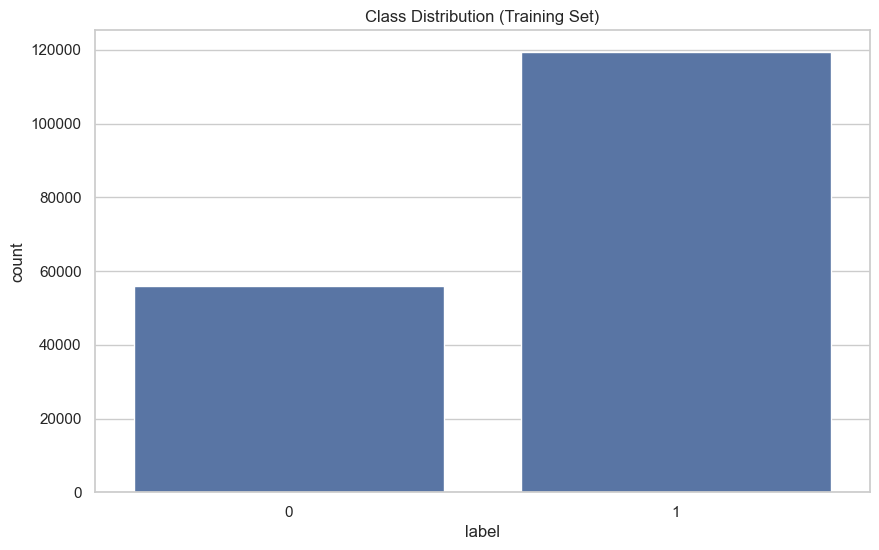

label
1    0.680622
0    0.319378
Name: proportion, dtype: float64

In [7]:
# Cell 6 — Class distribution
sns.countplot(x='label', data=train_df)
plt.title("Class Distribution (Training Set)")
plt.show()

train_df['label'].value_counts(normalize=True)

## Attack Categories
The dataset also contains an `attack_cat` column that specifies the type of attack.
We will inspect its distribution.


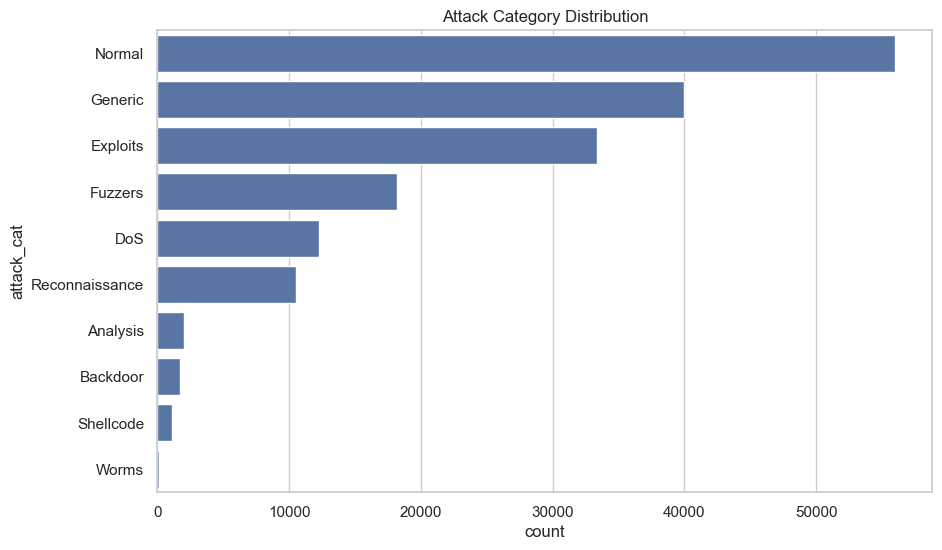

attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

In [8]:
# Cell 7 — Attack categories
sns.countplot(y='attack_cat', data=train_df, order=train_df['attack_cat'].value_counts().index)
plt.title("Attack Category Distribution")
plt.show()

train_df['attack_cat'].value_counts()

## Numerical Features Overview
We will inspect basic statistics of numerical columns to check for scale differences and outliers.


In [9]:
# Cell 8 — Describe numerical columns
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.000000,87671.000000,1.315060e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09


## Correlation Heatmap
We will plot correlations for numerical features to identify strongly related variables.

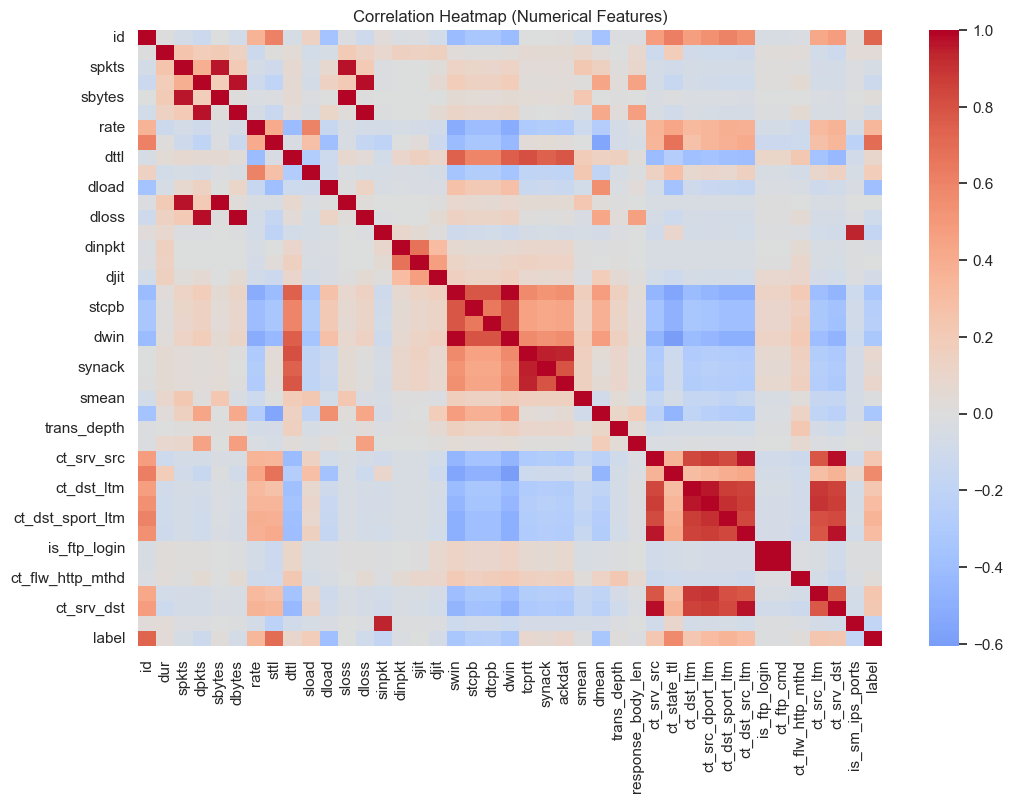

In [10]:
# Cell 9 — Correlation heatmap
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## Observations & Notes
- Record any unusual class imbalance
- Note high correlations that may affect model performance
- Identify columns that need encoding or scaling in preprocessing

In [13]:
# Cell 10 — Save initial EDA summary
eda_summary = {
    "train_shape": train_df.shape,
    "test_shape": test_df.shape,
    "train_class_distribution": train_df['label'].value_counts().to_dict(),
    "attack_categories": train_df['attack_cat'].value_counts().to_dict()
}

pd.Series(eda_summary).to_json("../results/eda/eda_summary.json")